In [1]:
#importing dependencies
import matplotlib.pyplot as plt;
import pandas as pd;
import scipy.stats as st;
import numpy as np;

# Importing and merging datasets

In [2]:
#Data files
mouse_metadata_path = 'Resources/Mouse_metadata.csv';
study_results_path = 'Resources/Study_results.csv';

#Reading in the data
mouse_metadata = pd.read_csv(mouse_metadata_path);
study_results = pd.read_csv(study_results_path);

#previewing column values for both data sets
print(mouse_metadata.columns);
print(study_results.columns);

#Merging the two data sets on their common column: Mouse ID
SCC_growth = mouse_metadata.merge(study_results , on= 'Mouse ID');

#Previewing merged data frame SCC_growth
SCC_growth.head(5)


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


# Cleaning Data (Drop Duplicates)

In [3]:
#checking for unique number of mice
mice_count = len(SCC_growth['Mouse ID'].unique())
print(mice_count);

#The duplicate rows in our dataset
duplicate_timepoints = SCC_growth[SCC_growth[['Timepoint' , 'Mouse ID']].duplicated() == True];

#Obtaining the unique Mice ID with duplicate timepoints
duplicate_mice = list(duplicate_timepoints['Mouse ID'].unique());
#its just g989

#The full data associated with duplicate values
duplicate_data = SCC_growth[(SCC_growth['Mouse ID'] == 'g989')==True];

 #dropping all Mice ID's associated with duplicates
SCC_growth.drop(list(SCC_growth[SCC_growth['Mouse ID'] == 'g989'].index) , inplace= True);

#Checking the new count of mice ID's
new_mice_count = len(SCC_growth['Mouse ID'].unique());
print(new_mice_count);






249
248


# Summary Statistics

In [4]:
#summary stats table for every drug regimen , includes: mean , median , variance , std , SEM

#Finding unique drug regimens
unique_drugs =  SCC_growth['Drug Regimen'].unique();

#empty list to contain lists storing specific drug regimen calculation
tumor_regimens = [];

#list contains regimen dataframes for use downstream
drug_regimens = [];

#grouping SCC_growth by by a specific drug regimen
for drug in unique_drugs:

    #SCC_growth view of current regimen
    regimen_view = SCC_growth[SCC_growth['Drug Regimen'] == drug];

    #subsetting further to obtain a view of Tumor Volume (mm3)
    tumor_view = regimen_view['Tumor Volume (mm3)'];

    #list to contain regimen specific information
    current_regimen = [];

    #appending current_regimen with subset calculations
    #When I have time return and use .aggregate to make this code DRY
    current_regimen.append(tumor_view.mean());
    current_regimen.append(tumor_view.median());
    current_regimen.append(tumor_view.var());
    current_regimen.append(tumor_view.std());
    current_regimen.append(tumor_view.sem());

    #defining dataframe index and columns
    Index = ['mean' , 'median' , 'variance' , 'std' , 'SEM'];
    Columns = [drug];

    #creating a summary dataframe for current_regimen's info
    curr_dataframe = pd.DataFrame(current_regimen , index = Index , columns= Columns)

    #appending drug_regimens
    drug_regimens.append(regimen_view);
    tumor_regimens.append(curr_dataframe)


tumor_volume_summary = pd.concat(tumor_regimens[:] , axis = 1);

tumor_volume_summary


,Ramicane,Capomulin,Infubinol,Placebo,Ceftamin,Stelasyn,Zoniferol,Ketapril,Propriva,Naftisol
mean,40.216745,40.675741,52.884795,54.033581,52.591172,54.233149,53.236507,55.235638,52.320930,54.331565
median,40.673236,41.557809,51.820584,52.288934,51.776157,52.431737,51.818479,53.698743,50.446266,52.509285
variance,23.486704,24.947764,43.128684,61.168083,39.290177,59.450562,48.533355,68.553577,43.852013,66.173479
std,4.846308,4.994774,6.567243,7.821003,6.268188,7.710419,6.966589,8.279709,6.622085,8.134708
SEM,0.320955,0.329346,0.492236,0.581331,0.469821,0.573111,0.516398,0.603860,0.544332,0.596466


# Bar Chart

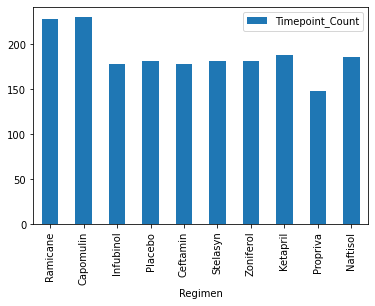

In [5]:
#segment the data by regimen , and display the total number of timepoints they contain

#obtaining the total timepoints per regimen
timepoints_by_regimen = [regimen['Timepoint'].count() for regimen in drug_regimens];

#obtaining the regimen name for each total count
timepoints_regimen = [regimen['Drug Regimen'].unique()[0] for regimen in drug_regimens];

#storing values in dictionary for conversion into Data Frame
timepoints_dict = {'Regimen': timepoints_regimen , 'Timepoint_Count': timepoints_by_regimen};

#Data Frame conversion
timepoints_df = pd.DataFrame(timepoints_dict);

#plotting the dataframe as a bar chart
timepoints_df.plot.bar(x = 'Regimen' , y = 'Timepoint_Count');



Text(0, 0.5, 'Time Point Count')

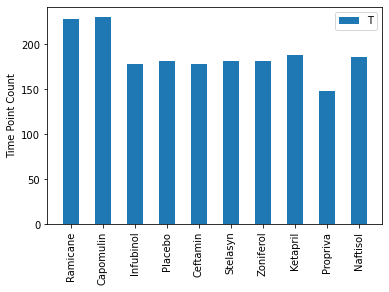

In [12]:
#generating the same bar chart using matplotlib
plt.bar(timepoints_regimen , timepoints_by_regimen , width=.5 , align='center');
plt.xticks(rotation=90);
plt.legend('Time Point')
plt.ylabel('Time Point Count')

#when you have time: return and make this chart purty!

# Pie Chart

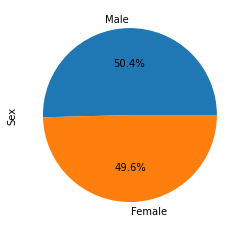

In [7]:
#Charts will show the gender distribution of mice in the entire study

#Removing duplicate mice ID for the gender distribution
unique_mice_df = SCC_growth.drop_duplicates(subset= 'Mouse ID')

#subsetting by gender
gender_counts = unique_mice_df['Sex'].value_counts()

#return and add a legend and labels
gender_counts.plot.pie(autopct = '%1.1f%%');


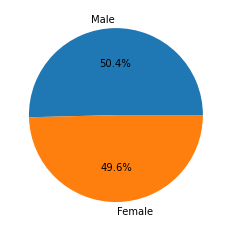

In [8]:
#making the same pie chart using matplot lib

#plotting
plt.pie(gender_counts , labels=gender_counts.index , autopct= '%1.1f%%' );

#Return and make this chart purty

# Quartiles , outliers , and Boxplots

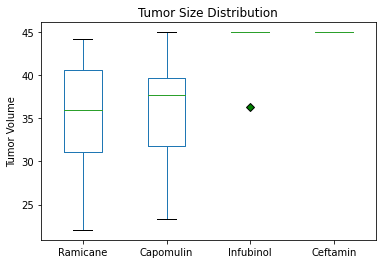

In [9]:
#Calculate final tumor volume for each mouse ID across the drug regimens of interest (DOI) = Drugs of Interest
DOI = ['Ramicane' , 'Capomulin' , 'Infubinol' , 'Ceftamin'];

#Collecting Drug specific data frames in a list 
DOI_subsets = [SCC_growth[SCC_growth['Drug Regimen'] == drug] for drug in DOI];

#Computing the final tumor volume (Vf) for each drug regimen
Vf = [df.groupby('Mouse ID')['Tumor Volume (mm3)'].min() for df in DOI_subsets]; 

#
Vf_df = pd.concat(Vf , axis = 1 )

#Rename the columns with name of the drug used
Vf_df.columns = DOI;

#Defining Style object
style = {'markerfacecolor': 'g' , 'marker': 'D'}

#Plot the Data Frame using a box and whisker plot
Vf_df.plot.box(flierprops = style , title='Tumor Size Distribution' , ylabel = 'Tumor Volume');





# Line Plot

<AxesSubplot:title={'center':'Timepoint Vs Vf'}, xlabel='Timepoint', ylabel='Tumor Volume'>

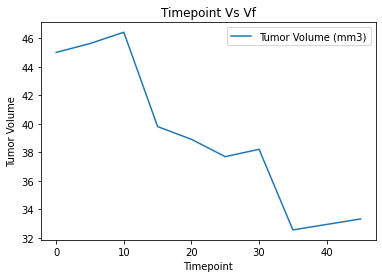

In [10]:
#Subset SCC_Growth by Capomulin and then by mice ID

#Capomulin subset is referenced by index 1 in DOI_Subsets
capomulin_df = DOI_subsets[1];

#Listing the mice in the capomulin study
capomulin_mice = capomulin_df['Mouse ID'].unique();

#Focusing on specimen m957 taken from capomulin_mice
mouse_m957 = capomulin_df[capomulin_df['Mouse ID'] == 'm957'];

#Generating the Tumor Volume Vf as a function of time (Timepoint)
mouse_m957.plot(x = 'Timepoint' , y = 'Tumor Volume (mm3)' , title = 'Timepoint Vs Vf' , ylabel = 'Tumor Volume'  )


# Scatter Plot

The correlation coefficient between Tumor Volume and Weight is 0.525699555207717


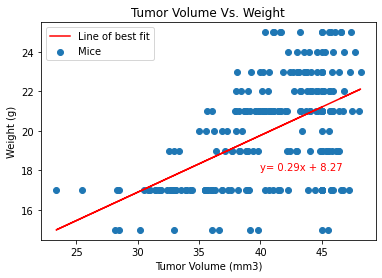

In [11]:
#Generating the scatter plot
x = capomulin_df['Tumor Volume (mm3)'];
y = capomulin_df['Weight (g)'];
scatter = plt.scatter(x , y )
plt.ylabel('Weight (g)');
plt.xlabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Vs. Weight')

#Creating a a line of best fit
(m , b , rval , pval , stderr) = st.linregress(x  , y);
line_eq = f'y= {round(m,2)}x + {round(b,2)}';

#Creating the regression data
regress_values = m*x + b;

#Plotting line of best fit
regress_line = plt.plot(x , regress_values , color='red')
plt.annotate(line_eq , (40, 18) , color='red' )
plt.legend(['Line of best fit' , 'Mice'] )


correlation = st.pearsonr(x , y);
print(f'The correlation coefficient between Tumor Volume and Weight is {correlation[0]}');

#Observations

1) The box plot seems to suggest that most regimens had a similar number of timepoins ~ 150 , with only two regimens exceding the 200 count [Ramicane , and Capomulin]

2) The box plot for Infubinol and Ceftamin indicate that the median is around 45 (mm3). We can infer that these drugs were not very effective as tumor reducing agents , at least within the given timepoints.

3) The Scatter plot of Tumor Volume Vs. Weight indicates a rough positive correlation , that is confirmed when the pearson r correlation coefficient is computed to be .52
This makes practical sense , since meatier animals would have the real estate to produce larger tumors.